# Main library

In [2]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
import string, nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Building Deep Learning model
from tensorflow.keras.layers import Dense, Embedding, Dropout, GlobalAveragePooling1D
import tensorflow.keras as k
import pickle

# Reading Data

In [3]:
data = pd.read_csv(r"D:\Courses language programming\LLM - Transformer - NLP\NLP - Complete Course\Projects For NLP\Data\IMDB Dataset of 50K Movie Reviews\IMDB Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.shape

(50000, 2)

In [5]:
data = data.loc[10000:20000]

In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

# Make Encoder ==> Data 

In [7]:
data.loc[data["sentiment"] == "positive", "sentiment"] = 1
data.loc[data["sentiment"] == "negative", "sentiment"] = 0

In [8]:
data.head(5)

,review,sentiment
10000,""" While sporadically engrossing (including a f...",0
10001,"A French novelist, disgusted by his wife's soc...",1
10002,"It must be remembered that the Gammera movies,...",0
10003,"I gave this film 8 out of 10, reserving 10 for...",1
10004,"Cheap, gloriously bad cheese from the 80's, th...",0


In [9]:
data.head(2)

,review,sentiment
10000,""" While sporadically engrossing (including a f...",0
10001,"A French novelist, disgusted by his wife's soc...",1


# Make Analysis To Text & Remove punctuation & Stopwords 

In [10]:
punc = list(string.punctuation)
stop_word = stopwords.words("english")
lemma = WordNetLemmatizer()

In [11]:
def Analysis_text(data):
    data = data.lower()
    data = re.sub('[^a-zA-Z]', ' ', data)
    data = [word for word in word_tokenize(data) if (word not in punc) and (word not in stop_word)]
    data = " ".join(data)
    
    return data

In [12]:
data["review"] = data["review"].apply(Analysis_text)

In [13]:
data.head(5)

,review,sentiment
10000,sporadically engrossing including effectively ...,0
10001,french novelist disgusted wife society friends...,1
10002,must remembered gammera movies like many first...,0
10003,gave film reserving e g amadeus slumdog millio...,1
10004,cheap gloriously bad cheese decade cheese watc...,0


In [14]:
X = data["review"]
Y = data["sentiment"]

# Make one hot encoder To Y(Output)

In [15]:
label = to_categorical(Y, 2)
label[0]

array([1., 0.], dtype=float32)

# Make Tokenization

In [16]:
tokenize = Tokenizer()
tokenize.fit_on_texts(X)

token_seq = tokenize.texts_to_sequences(X)
max_sen = max([len(i) for i in token_seq])

pad_data = pad_sequences(token_seq, maxlen=max_sen, padding="pre")

print("The MAx Length Sentence is --> ", max_sen)
print("The Shape Of Padding Data --> ", pad_data.shape)

The MAx Length Sentence is -->  936
The Shape Of Padding Data -->  (10001, 936)


In [25]:
voc_size = len(tokenize.word_index) + 1

print("The Length Of Vocab Size is --> ", voc_size)

The Length Of Vocab Size is -->  51066


# Splitting Data to Training & Testing

In [18]:
x_train, x_test, y_train, y_test = train_test_split(pad_data, label, train_size=0.7)

# Building Deep Learning Model

In [19]:
model = k.models.Sequential([
    Embedding(voc_size, max_sen, input_length=max_sen),
    GlobalAveragePooling1D(),

    Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 936, 936)          47797776  
                                                                 
 global_average_pooling1d (G  (None, 936)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 2)                 1874      
                                                                 
Total params: 47,799,650
Trainable params: 47,799,650
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
219/219 [==============================] - 11s 44ms/step - loss: 0.6837 - accuracy: 0.5657 - val_loss: 0.6598 - val_accuracy: 0.6148
Epoch 2/10
219/219 [==============================] - 9s 43ms/step - loss: 0.5809 - accuracy: 0.7506 - val_loss: 0.4983 - val_accuracy: 0.8484
Epoch 3/10
219/219 [==============================] - 9s 43ms/step - loss: 0.4094 - accuracy: 0.8553 - val_loss: 0.3906 - val_accuracy: 0.8654
Epoch 4/10
219/219 [==============================] - 10s 44ms/step - loss: 0.2890 - accuracy: 0.9093 - val_loss: 0.3415 - val_accuracy: 0.8724
Epoch 5/10
219/219 [==============================] - 10s 43ms/step - loss: 0.2264 - accuracy: 0.9294 - val_loss: 0.3231 - val_accuracy: 0.8750
Epoch 6/10
219/219 [==============================] - 10s 43ms/step - loss: 0.1682 - accuracy: 0.9551 - val_loss: 0.3107 - val_accuracy: 0.8800
Epoch 7/10
219/219 [==============================] - 10s 43ms/step - loss: 0.1352 - accuracy: 0.9633 - val_loss: 0.3073 - val_accuracy: 0

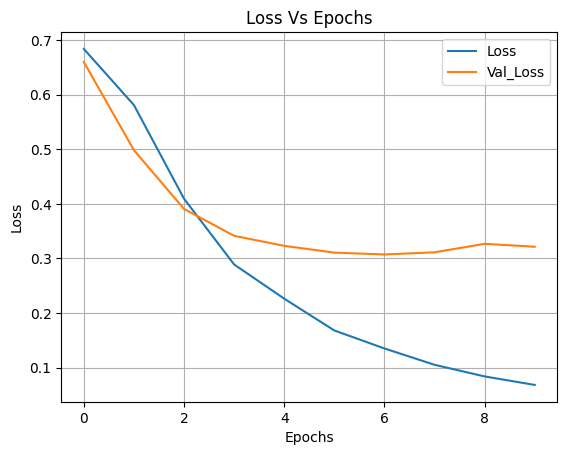

In [21]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

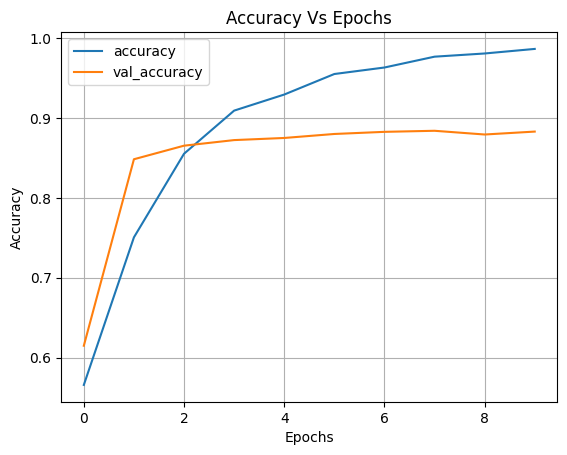

In [22]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Save

In [23]:
model.save(r'D:\Pycharm\Computer Vision Project\NLP Project\IMDB Review\model.h5')

In [24]:
pickle.dump(tokenize, open(r'D:\Pycharm\Computer Vision Project\NLP Project\IMDB Review\tokenizer.bin', 'wb'))

# Deploy

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import streamlit as st
import pickle


model = load_model(r'D:\Pycharm\Computer Vision Project\NLP Project\IMDB Review\model.h5')
tokenizer = pickle.load(open(r'D:\Pycharm\Computer Vision Project\NLP Project\IMDB Review\tokenizer.bin', 'rb'))
class_label = {1: 'Good', 0: 'Bad'}
st.title('IMDB Review. 🎞️🎞️')

text = st.text_input('Enter THe Text')
if text:
    text = tokenizer.texts_to_sequences([text])
    pad_seq = np.array(pad_sequences(text, maxlen=936, padding="pre"))
    if st.button('predict'):
        prediction = model.predict(pad_seq)
        st.write(class_label[prediction.argmax()])